In [20]:
import pandas as pd 
import matplotlib.pyplot as plt 
from numpy import array
import numpy as np

filename_1 = 'data/servers.csv'
filename_2 = 'data/selling_prices.csv'
filename_3 = 'data/demand.csv'
filename_4 = 'data/datacenters.csv'
filename_5 = 'data/price_elasticity_of_demand.csv'

df_servers = pd.read_csv(filename_1)
df_selling_prices = pd.read_csv(filename_2)
df_demand = pd.read_csv(filename_3)
df_datacenters = pd.read_csv(filename_4)
df_price_elasticity_of_demand = pd.read_csv(filename_5)

In [31]:
df_datacenters

,datacenter_id,cost_of_energy,latency_sensitivity,slots_capacity
0,DC1,0.25,low,25245
1,DC2,0.35,medium,15300
2,DC3,0.65,high,7020
3,DC4,0.75,high,8280


In [21]:
df_price_elasticity_of_demand

,server_generation,latency_sensitivity,elasticity
0,CPU.S1,low,-1.033827
1,CPU.S2,low,-1.699802
2,CPU.S3,low,-1.432123
3,CPU.S4,low,-1.929676
4,GPU.S1,low,-1.284143
5,GPU.S2,low,-1.126775
6,GPU.S3,low,-1.217129
7,CPU.S1,medium,-1.255172
8,CPU.S2,medium,-1.455615
9,CPU.S3,medium,-2.225752


In [15]:
df_servers

,server_generation,server_type,release_time,purchase_price,slots_size,energy_consumption,capacity,life_expectancy,cost_of_moving,average_maintenance_fee
0,CPU.S1,CPU,"[1,60]",15000,2,400,60,96,1000,288
1,CPU.S2,CPU,"[37,96]",16000,2,460,75,96,1000,308
2,CPU.S3,CPU,"[73,132]",19500,2,800,120,96,1000,375
3,CPU.S4,CPU,"[109,168]",22000,2,920,160,96,1000,423
4,GPU.S1,GPU,"[1,72]",120000,4,3000,8,96,1000,2310
5,GPU.S2,GPU,"[49,120]",140000,4,3000,8,96,1000,2695
6,GPU.S3,GPU,"[97,168]",160000,4,4200,8,96,1000,3080


In [3]:
df_selling_prices

,server_generation,latency_sensitivity,selling_price
0,CPU.S1,low,10.0
1,CPU.S2,low,10.0
2,CPU.S3,low,11.0
3,CPU.S4,low,12.0
4,GPU.S1,low,1500.0
5,GPU.S2,low,1600.0
6,GPU.S3,low,2150.0
7,CPU.S1,medium,15.0
8,CPU.S2,medium,15.0
9,CPU.S3,medium,16.5


In [17]:
# merge df_servers and df_selling_prices
df_servers_selling_prices = pd.merge(df_servers, df_selling_prices, on='server_generation')

In [19]:
df_datacenters

,datacenter_id,cost_of_energy,latency_sensitivity,slots_capacity
0,DC1,0.25,low,25245
1,DC2,0.35,medium,15300
2,DC3,0.65,high,7020
3,DC4,0.75,high,8280


In [18]:
df_servers_selling_prices

,server_generation,server_type,release_time,purchase_price,slots_size,energy_consumption,capacity,life_expectancy,cost_of_moving,average_maintenance_fee,latency_sensitivity,selling_price
0,CPU.S1,CPU,"[1,60]",15000,2,400,60,96,1000,288,low,10.0
1,CPU.S1,CPU,"[1,60]",15000,2,400,60,96,1000,288,medium,15.0
2,CPU.S1,CPU,"[1,60]",15000,2,400,60,96,1000,288,high,25.0
3,CPU.S2,CPU,"[37,96]",16000,2,460,75,96,1000,308,low,10.0
4,CPU.S2,CPU,"[37,96]",16000,2,460,75,96,1000,308,medium,15.0
5,CPU.S2,CPU,"[37,96]",16000,2,460,75,96,1000,308,high,25.0
6,CPU.S3,CPU,"[73,132]",19500,2,800,120,96,1000,375,low,11.0
7,CPU.S3,CPU,"[73,132]",19500,2,800,120,96,1000,375,medium,16.5
8,CPU.S3,CPU,"[73,132]",19500,2,800,120,96,1000,375,high,27.5
9,CPU.S4,CPU,"[109,168]",22000,2,920,160,96,1000,423,low,12.0


In [4]:
df_demand

,time_step,latency_sensitivity,CPU.S1,CPU.S2,CPU.S3,CPU.S4,GPU.S1,GPU.S2,GPU.S3
0,1,high,4000,0,0,0,24,0,0
1,2,high,8160,0,0,0,48,0,0
2,3,high,11016,0,0,0,76,0,0
3,4,high,13953,0,0,0,104,0,0
4,5,high,19186,0,0,0,134,0,0
...,...,...,...,...,...,...,...,...,...
499,164,low,0,0,243279,748553,0,610,3703
500,165,low,0,0,255443,785981,0,586,3813
501,166,low,0,0,268216,825280,0,560,3926
502,167,low,0,0,281626,866544,0,532,4044


In [11]:
def get_known(key):
    # STORE SOME CONFIGURATION VARIABLES
    if key == 'datacenter_id':
        return ['DC1', 
                'DC2', 
                'DC3', 
                'DC4']
    elif key == 'actions':
        return ['buy',
                'hold',
                'move',
                'dismiss']
    elif key == 'server_generation':
        return ['CPU.S1', 
                'CPU.S2', 
                'CPU.S3', 
                'CPU.S4', 
                'GPU.S1', 
                'GPU.S2', 
                'GPU.S3']
    elif key == 'latency_sensitivity':
        return ['high', 
                'medium', 
                'low']
    elif key == 'required_columns':
        return ['time_step', 
                'datacenter_id', 
                'server_generation', 
                'server_id',
                'action']
    elif key == 'time_steps':
        return 168

In [8]:
def get_random_walk(n, mu, sigma):
    # HELPER FUNCTION TO GET A RANDOM WALK TO CHANGE THE DEMAND PATTERN
    r = np.random.normal(mu, sigma, n)
    ts = np.empty(n)
    ts[0] = r[0]
    for i in range(1, n):
        ts[i] = ts[i - 1] + r[i]
    ts = (2 * (ts - ts.min()) / np.ptp(ts)) - 1
    return ts

In [9]:
def get_actual_demand(demand):
    # CALCULATE THE ACTUAL DEMAND AT TIME-STEP t
    actual_demand = []
    for ls in get_known('latency_sensitivity'):
        for sg in get_known('server_generation'):
            d = demand[demand['latency_sensitivity'] == ls]
            sg_demand = d[sg].values.astype(float)
            rw = get_random_walk(sg_demand.shape[0], 0, 2)
            sg_demand += (rw * sg_demand)

            ls_sg_demand = pd.DataFrame()
            ls_sg_demand['time_step'] = d['time_step']
            ls_sg_demand['server_generation'] = sg
            ls_sg_demand['latency_sensitivity'] = ls
            ls_sg_demand['demand'] = sg_demand.astype(int)
            actual_demand.append(ls_sg_demand)

    actual_demand = pd.concat(actual_demand, axis=0, ignore_index=True)
    actual_demand = actual_demand.pivot(index=['time_step', 'server_generation'], columns='latency_sensitivity')
    actual_demand.columns = actual_demand.columns.droplevel(0)
    actual_demand = actual_demand.loc[actual_demand[get_known('latency_sensitivity')].sum(axis=1) > 0]
    actual_demand = actual_demand.reset_index(['time_step', 'server_generation'], col_level=1, inplace=False)
    actual_demand = actual_demand.loc[actual_demand['time_step'] > 96]
    return actual_demand

In [6]:
df_demand

,time_step,latency_sensitivity,CPU.S1,CPU.S2,CPU.S3,CPU.S4,GPU.S1,GPU.S2,GPU.S3
0,1,high,4000,0,0,0,24,0,0
1,2,high,8160,0,0,0,48,0,0
2,3,high,11016,0,0,0,76,0,0
3,4,high,13953,0,0,0,104,0,0
4,5,high,19186,0,0,0,134,0,0
...,...,...,...,...,...,...,...,...,...
499,164,low,0,0,243279,748553,0,610,3703
500,165,low,0,0,255443,785981,0,586,3813
501,166,low,0,0,268216,825280,0,560,3926
502,167,low,0,0,281626,866544,0,532,4044


In [12]:
get_actual_demand(df_demand)

latency_sensitivity,time_step,server_generation,high,low,medium
324,97,CPU.S1,27582,588487,256103
325,97,CPU.S2,131618,868091,192525
326,97,CPU.S3,42690,318231,114044
327,97,GPU.S1,486,1680,558
328,97,GPU.S2,205,813,415
...,...,...,...,...,...
667,167,GPU.S3,55,852,1074
668,168,CPU.S3,0,497850,92852
669,168,CPU.S4,172605,1874342,1143838
670,168,GPU.S2,160,914,57


In [13]:
df_demand

,time_step,latency_sensitivity,CPU.S1,CPU.S2,CPU.S3,CPU.S4,GPU.S1,GPU.S2,GPU.S3
0,1,high,4000,0,0,0,24,0,0
1,2,high,8160,0,0,0,48,0,0
2,3,high,11016,0,0,0,76,0,0
3,4,high,13953,0,0,0,104,0,0
4,5,high,19186,0,0,0,134,0,0
...,...,...,...,...,...,...,...,...,...
499,164,low,0,0,243279,748553,0,610,3703
500,165,low,0,0,255443,785981,0,586,3813
501,166,low,0,0,268216,825280,0,560,3926
502,167,low,0,0,281626,866544,0,532,4044


In [27]:
df_demand
df = df_demand.copy()
filtered_df = df[df['latency_sensitivity'] == 'high']
# multiply filtered_df[x] by 100 if x starts with 'GPU'
for x in filtered_df.columns:
    if x.startswith('GPU'):
        filtered_df[x] = filtered_df[x] * 100

C:\Users\Gracie Zhou\AppData\Local\Temp\ipykernel_4548\135842316.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[x] = filtered_df[x] * 100
C:\Users\Gracie Zhou\AppData\Local\Temp\ipykernel_4548\135842316.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[x] = filtered_df[x] * 100
C:\Users\Gracie Zhou\AppData\Local\Temp\ipykernel_4548\135842316.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [28]:
filtered_df

,time_step,latency_sensitivity,CPU.S1,CPU.S2,CPU.S3,CPU.S4,GPU.S1,GPU.S2,GPU.S3
0,1,high,4000,0,0,0,2400,0,0
1,2,high,8160,0,0,0,4800,0,0
2,3,high,11016,0,0,0,7600,0,0
3,4,high,13953,0,0,0,10400,0,0
4,5,high,19186,0,0,0,13400,0,0
...,...,...,...,...,...,...,...,...,...
163,164,high,0,0,56141,299421,0,35200,427200
164,165,high,0,0,58948,314392,0,33800,440000
165,166,high,0,0,61896,330112,0,32300,453200
166,167,high,0,0,64990,346617,0,30800,466600


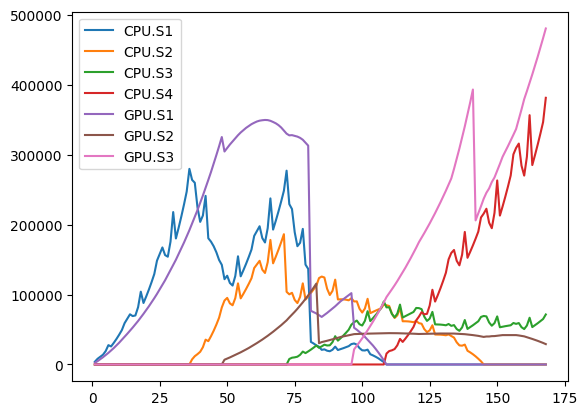

In [30]:


# merge df_servers_selling_prices and filtered_df according to server generation
# df_servers_selling_prices_filtered = pd.merge(df_servers_selling_prices, filtered_df, on='server_generation')
fig, ax = plt.subplots()

ax.plot(filtered_df['time_step'],filtered_df['CPU.S1'], label = 'CPU.S1')
ax.plot(filtered_df['time_step'],filtered_df['CPU.S2'], label = 'CPU.S2')
ax.plot(filtered_df['time_step'],filtered_df['CPU.S3'], label = 'CPU.S3')
ax.plot(filtered_df['time_step'],filtered_df['CPU.S4'], label = 'CPU.S4')
ax.plot(filtered_df['time_step'],filtered_df['GPU.S1'], label = 'GPU.S1')
ax.plot(filtered_df['time_step'],filtered_df['GPU.S2'], label = 'GPU.S2')
ax.plot(filtered_df['time_step'],filtered_df['GPU.S3'], label = 'GPU.S3')
# show the labels
ax.legend()

In [7]:
df_datacenters

,datacenter_id,cost_of_energy,latency_sensitivity,slots_capacity
0,DC1,0.25,low,25245
1,DC2,0.35,medium,15300
2,DC3,0.65,high,7020
3,DC4,0.75,high,8280
